In [1]:
# Data Exploration and Preprocessing
# House Prices - Advanced Regression Techniques
# Capstone Project

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import skew

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

# Set visualization style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

In [2]:
# 1. Loading Data

# Load training and test data
train = pd.read_csv('../data/train.csv')
test = pd.read_csv('../data/test.csv')

print(f"Training data shape: {train.shape}")
print(f"Test data shape: {test.shape}")


Training data shape: (1460, 81)
Test data shape: (1459, 80)


In [3]:
# 2. Initial Data Exploration

print("First 5 Rows of Training Data:")
print(train.head())


print("Data Types and Non-Null Counts:")
print(train.info())


print("Basic Statistics for Numerical Features:")
print(train.describe())


First 5 Rows of Training Data:
   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam   

Target Variable (SalePrice) Statistics:
count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64




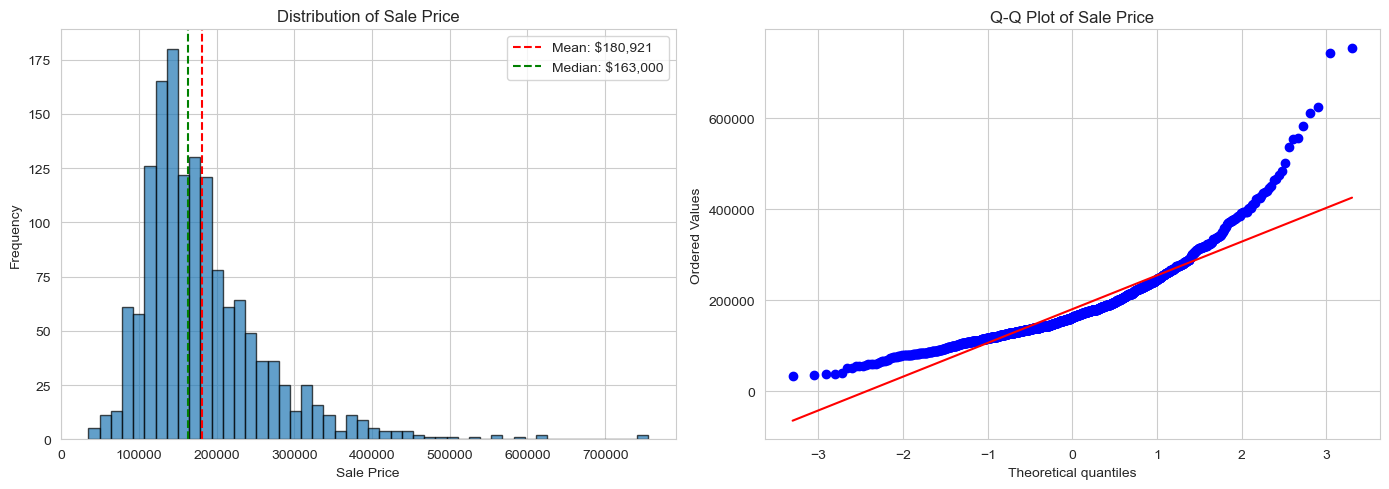

Skewness: 1.883
Kurtosis: 6.536


In [4]:
# 3. Target Variable Analysis(SalePrice)

print("Target Variable (SalePrice) Statistics:")
print(train['SalePrice'].describe())
print("\n")

# Visualize target variable distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram
axes[0].hist(train['SalePrice'], bins=50, edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Sale Price')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Sale Price')
axes[0].axvline(train['SalePrice'].mean(), color='red', linestyle='--', label=f'Mean: ${train["SalePrice"].mean():,.0f}')
axes[0].axvline(train['SalePrice'].median(), color='green', linestyle='--', label=f'Median: ${train["SalePrice"].median():,.0f}')
axes[0].legend()

# Q-Q plot
stats.probplot(train['SalePrice'], dist="norm", plot=axes[1])
axes[1].set_title('Q-Q Plot of Sale Price')

plt.tight_layout()
plt.savefig('../results/visualizations/data_explo_target_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

# Check skewness and kurtosis
print(f"Skewness: {train['SalePrice'].skew():.3f}")
print(f"Kurtosis: {train['SalePrice'].kurt():.3f}")


MISSING VALUES IN Training Set:
Total features with missing values: 19
              Missing_Count    Percent
PoolQC                 1453  99.520548
MiscFeature            1406  96.301370
Alley                  1369  93.767123
Fence                  1179  80.753425
MasVnrType              872  59.726027
FireplaceQu             690  47.260274
LotFrontage             259  17.739726
GarageType               81   5.547945
GarageYrBlt              81   5.547945
GarageFinish             81   5.547945
GarageQual               81   5.547945
GarageCond               81   5.547945
BsmtFinType2             38   2.602740
BsmtExposure             38   2.602740
BsmtFinType1             37   2.534247
BsmtCond                 37   2.534247
BsmtQual                 37   2.534247
MasVnrArea                8   0.547945
Electrical                1   0.068493


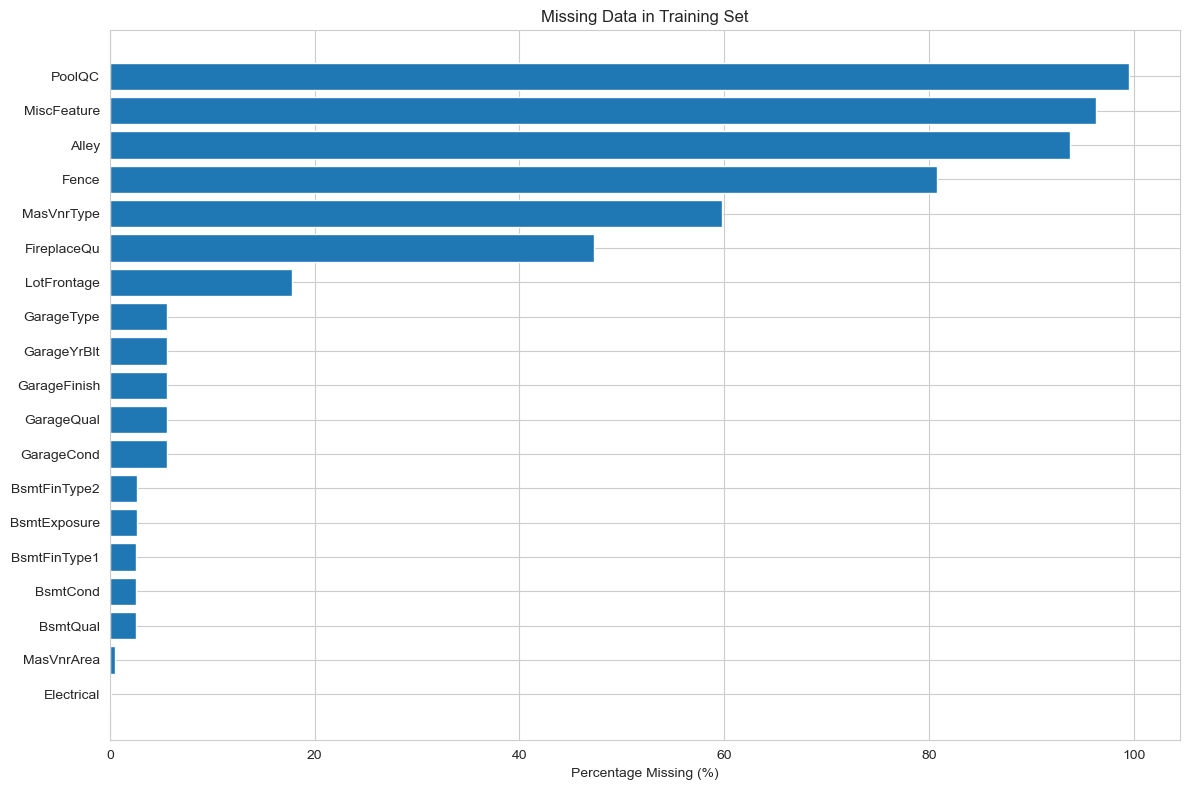


MISSING VALUES IN Test Set:
Total features with missing values: 33
              Missing_Count    Percent
PoolQC                 1456  99.794380
MiscFeature            1408  96.504455
Alley                  1352  92.666210
Fence                  1169  80.123372
MasVnrType              894  61.274846
FireplaceQu             730  50.034270
LotFrontage             227  15.558602
GarageCond               78   5.346127
GarageYrBlt              78   5.346127
GarageQual               78   5.346127
GarageFinish             78   5.346127
GarageType               76   5.209047
BsmtCond                 45   3.084304
BsmtExposure             44   3.015764
BsmtQual                 44   3.015764
BsmtFinType1             42   2.878684
BsmtFinType2             42   2.878684
MasVnrArea               15   1.028101
MSZoning                  4   0.274160
BsmtFullBath              2   0.137080
BsmtHalfBath              2   0.137080
Functional                2   0.137080
Utilities                 2   0.137

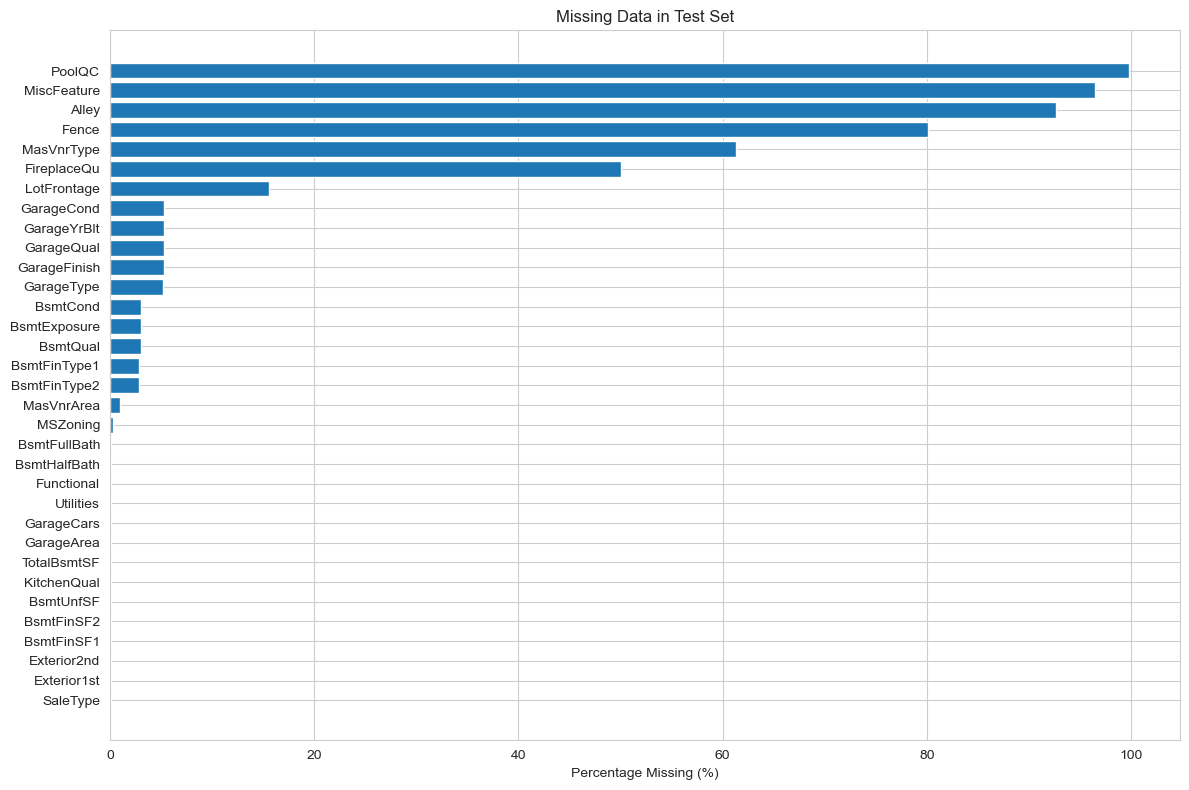

In [5]:
# 4. Missing Values Analysis

def analyze_missing_data(df, dataset_name):
    """Analyze and visualize missing data"""
    missing = df.isnull().sum()
    missing_pct = 100 * missing / len(df)
    missing_table = pd.DataFrame({
        'Missing_Count': missing,
        'Percent': missing_pct
    })
    missing_table = missing_table[missing_table['Missing_Count'] > 0].sort_values(
        'Percent', ascending=False
    )
    
    print(f"\nMISSING VALUES IN {dataset_name}:")
    print(f"Total features with missing values: {len(missing_table)}")
    print(missing_table)
    
    if len(missing_table) > 0:
        # Visualize missing data
        plt.figure(figsize=(12, 8))
        plt.barh(missing_table.index, missing_table['Percent'])
        plt.xlabel('Percentage Missing (%)')
        plt.title(f'Missing Data in {dataset_name}')
        plt.gca().invert_yaxis()
        plt.tight_layout()
        plt.savefig(f'../results/visualizations/data_explo_missing_data_{dataset_name.lower()}.png', dpi=300, bbox_inches='tight')
        plt.show()
    
    return missing_table

missing_train = analyze_missing_data(train, 'Training Set')
missing_test = analyze_missing_data(test, 'Test Set')


In [6]:
# 5. Feature Type Identification

# Separate numerical and categorical features
numerical_features = train.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = train.select_dtypes(include=['object']).columns.tolist()

# Remove 'Id' and 'SalePrice' from numerical features
if 'Id' in numerical_features:
    numerical_features.remove('Id')
if 'SalePrice' in numerical_features:
    numerical_features.remove('SalePrice')

print(f"Number of numerical features: {len(numerical_features)}")
print(f"Number of categorical features: {len(categorical_features)}")
print("\n")
print("Numerical features:", numerical_features[:10], "...")
print("\n")
print("Categorical features:", categorical_features[:10], "...")

Number of numerical features: 36
Number of categorical features: 43


Numerical features: ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2'] ...


Categorical features: ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1'] ...


Outlier Detection For Key Numerical Features:


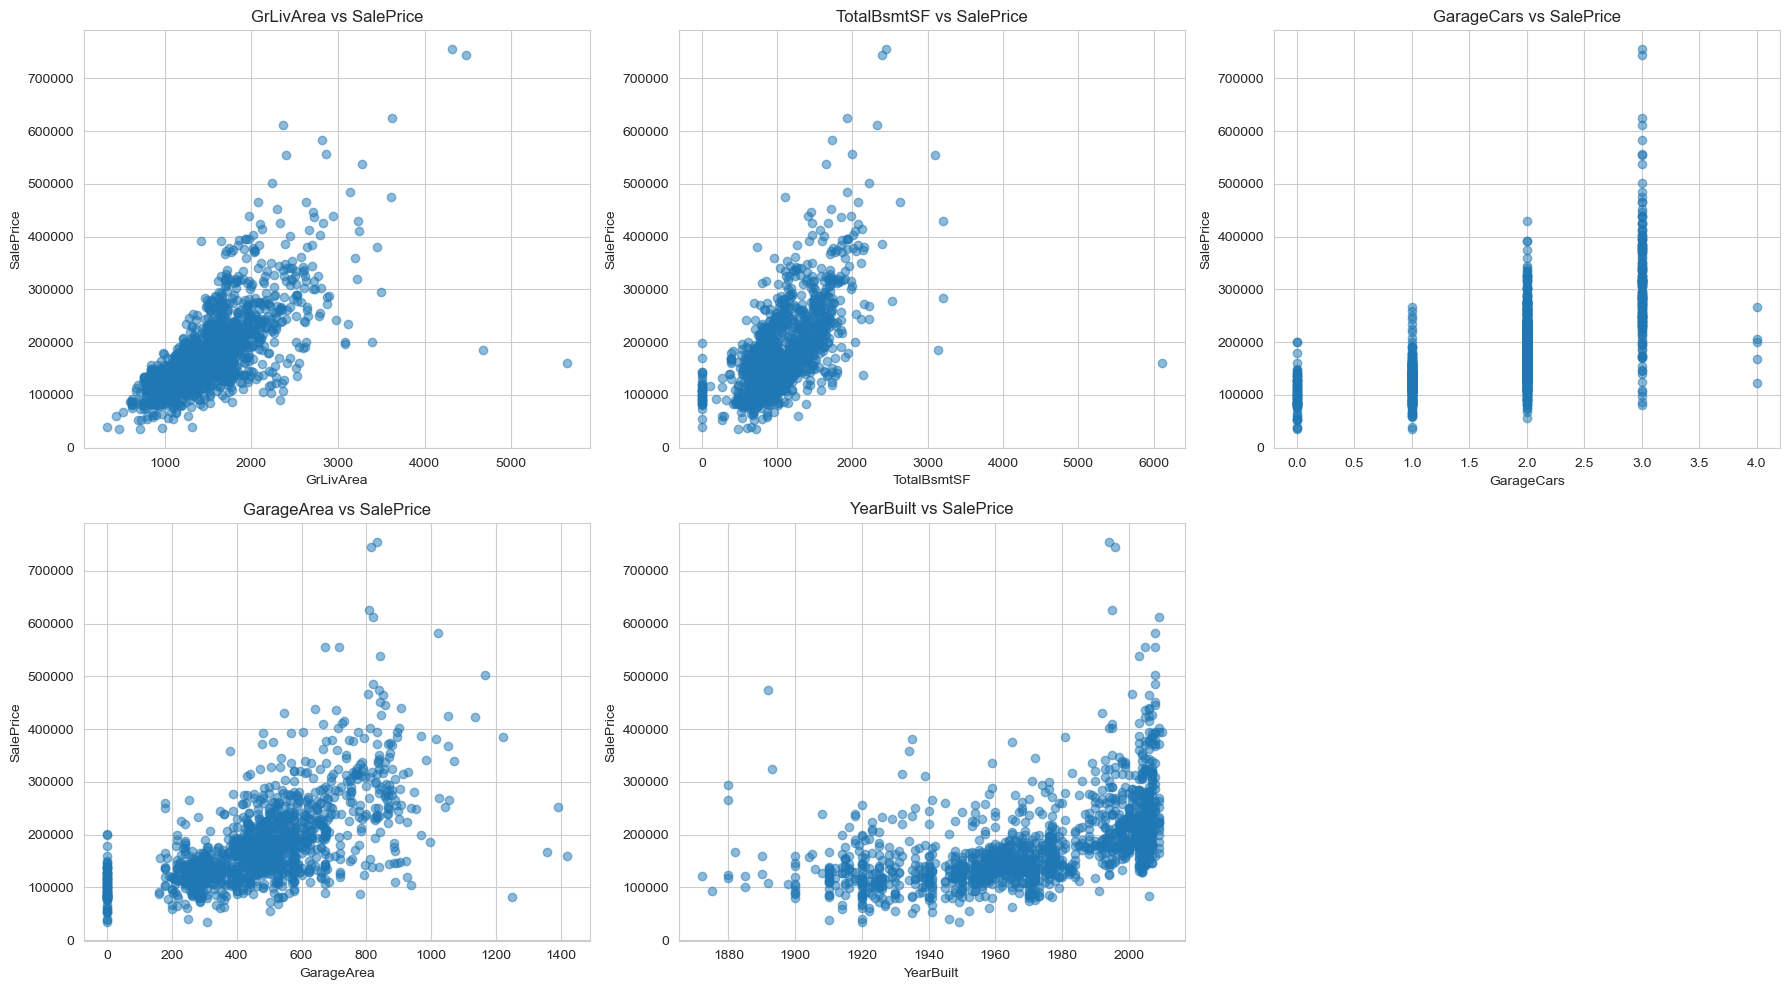


Outlier counts (IQR method):
GrLivArea: 31 outliers (bounds: 158.62 to 2747.62)
TotalBsmtSF: 61 outliers (bounds: 42.00 to 2052.00)
GarageCars: 5 outliers (bounds: -0.50 to 3.50)
GarageArea: 21 outliers (bounds: -27.75 to 938.25)
YearBuilt: 7 outliers (bounds: 1885.00 to 2069.00)


In [7]:
# 6. OUTLIER DETECTION

print("Outlier Detection For Key Numerical Features:")

# Check outliers for important numerical features
important_num_features = ['GrLivArea', 'TotalBsmtSF', 'GarageCars', 'GarageArea', 'YearBuilt']

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()

for idx, feature in enumerate(important_num_features):
    axes[idx].scatter(train[feature], train['SalePrice'], alpha=0.5)
    axes[idx].set_xlabel(feature)
    axes[idx].set_ylabel('SalePrice')
    axes[idx].set_title(f'{feature} vs SalePrice')

# Remove empty subplot
axes[-1].axis('off')

plt.tight_layout()
plt.savefig('../results/visualizations/data_explo_scatter_important_features.png', dpi=300, bbox_inches='tight')
plt.show()

# Statistical outlier detection using IQR method
def detect_outliers_iqr(df, feature):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]
    return len(outliers), lower_bound, upper_bound

print("\nOutlier counts (IQR method):")
for feature in important_num_features:
    count, lower, upper = detect_outliers_iqr(train, feature)
    print(f"{feature}: {count} outliers (bounds: {lower:.2f} to {upper:.2f})")

Top 15 Features Correlated with SalePrice:
SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
GarageYrBlt     0.486362
MasVnrArea      0.477493
Fireplaces      0.466929
BsmtFinSF1      0.386420
LotFrontage     0.351799
Name: SalePrice, dtype: float64




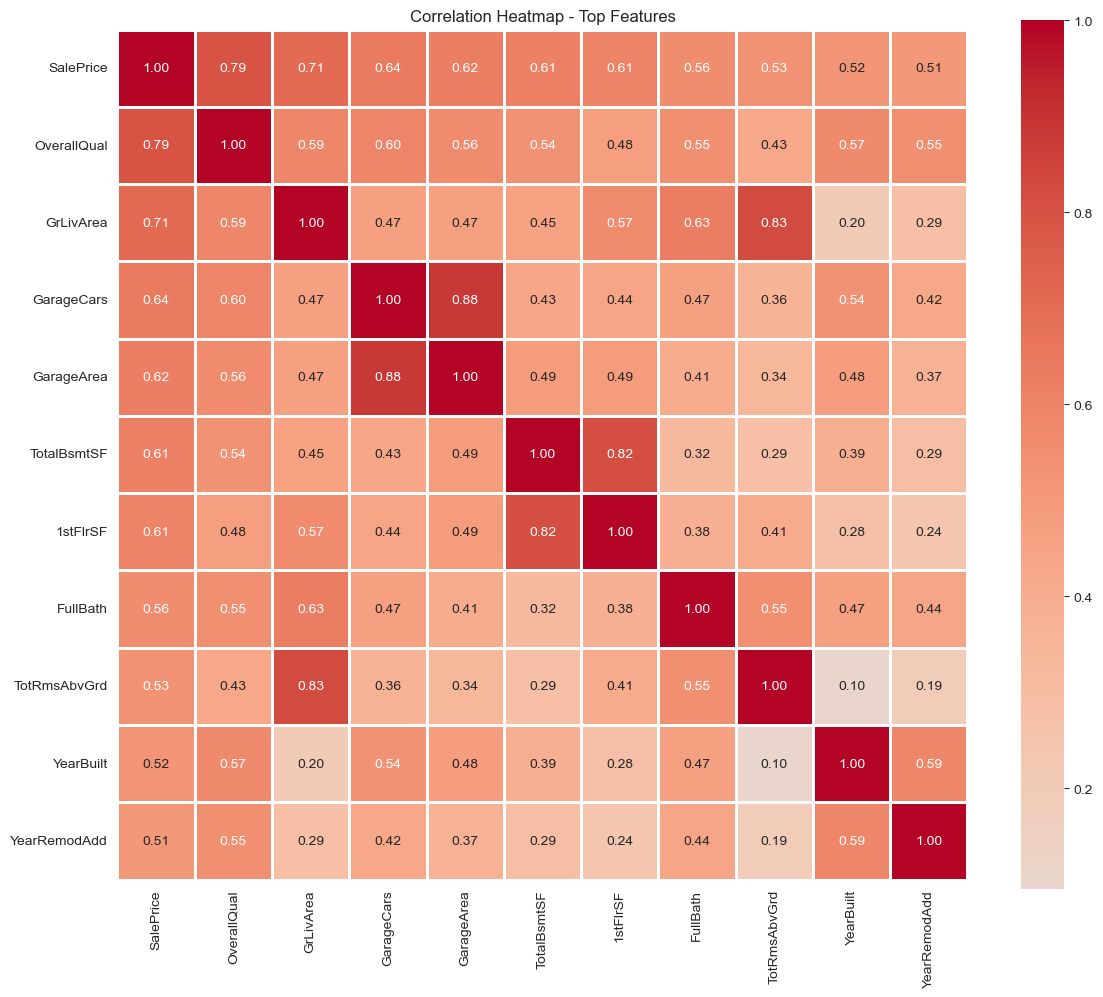

In [8]:
# 7. Correlation Analysis

print("Top 15 Features Correlated with SalePrice:")

# Calculate correlations with target
correlations = train[numerical_features + ['SalePrice']].corr()['SalePrice'].sort_values(ascending=False)
print(correlations.head(16))  # Top 15 + SalePrice itself
print("\n")

# Visualize correlation heatmap for top features
top_corr_features = correlations.head(11).index.tolist()  # Top 10 + SalePrice
corr_matrix = train[top_corr_features].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f', 
            square=True, linewidths=1)
plt.title('Correlation Heatmap - Top Features')
plt.tight_layout()
plt.savefig('../results/visualizations/data_explo_correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

In [9]:
# 8. Data Preprocessing

print("STARTING DATA PREPROCESSING...")

# Save test IDs for later submission
test_ID = test['Id']

# Combine train and test for consistent preprocessing
all_data = pd.concat([train.drop('SalePrice', axis=1), test], axis=0, ignore_index=True)
print(f"Combined data shape: {all_data.shape}")

# Drop Id column
all_data.drop('Id', axis=1, inplace=True)

# --- 8.1: Handle Missing Values ---
print("\n--- Handling Missing Values ---")

# Features where NA means "None" or "No feature"
none_cols = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu',
             'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
             'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
             'MasVnrType']

for col in none_cols:
    if col in all_data.columns:
        all_data[col].fillna('None', inplace=True)

# Features where NA means 0
zero_cols = ['GarageYrBlt', 'GarageArea', 'GarageCars',
             'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
             'BsmtFullBath', 'BsmtHalfBath', 'MasVnrArea']

for col in zero_cols:
    if col in all_data.columns:
        all_data[col].fillna(0, inplace=True)

# For other categorical features, fill with mode
categorical_cols = all_data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    if all_data[col].isnull().sum() > 0:
        all_data[col].fillna(all_data[col].mode()[0], inplace=True)

# For remaining numerical features, fill with median
numerical_cols = all_data.select_dtypes(include=[np.number]).columns
for col in numerical_cols:
    if all_data[col].isnull().sum() > 0:
        all_data[col].fillna(all_data[col].median(), inplace=True)

print(f"Missing values after imputation: {all_data.isnull().sum().sum()}")

# --- 8.2: Feature Engineering ---
print("\n--- Feature Engineering ---")

# Create total square footage feature
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']

# Create total bathrooms feature
all_data['TotalBath'] = (all_data['FullBath'] + 
                          0.5 * all_data['HalfBath'] + 
                          all_data['BsmtFullBath'] + 
                          0.5 * all_data['BsmtHalfBath'])

# House age at time of sale
all_data['HouseAge'] = all_data['YrSold'] - all_data['YearBuilt']
all_data['RemodAge'] = all_data['YrSold'] - all_data['YearRemodAdd']

# Binary feature: Was the house remodeled?
all_data['IsRemodeled'] = (all_data['YearRemodAdd'] != all_data['YearBuilt']).astype(int)

print(f"New features created: TotalSF, TotalBath, HouseAge, RemodAge, IsRemodeled")

# --- 8.3: Handle Skewed Features ---
print("\n--- Handling Skewed Features ---")

# Get numerical features
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

# Check skewness of all numerical features
skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print(f"\nSkewness statistics:")
print(skewed_feats.head(10))

# Box Cox Transformation of highly skewed features
skewness = skewed_feats[abs(skewed_feats) > 0.75]
print(f"\nNumber of highly skewed features (>0.75): {len(skewness)}")

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    all_data[feat] = boxcox1p(all_data[feat], lam)

print("Box-Cox transformation applied to skewed features")

# --- 8.4: Encode Categorical Variables ---
print("\n--- Encoding Categorical Variables ---")

# Get dummy variables for categorical features
all_data = pd.get_dummies(all_data, drop_first=True)
print(f"Shape after encoding: {all_data.shape}")

# --- 8.5: Split Back into Train and Test ---
print("\n--- Splitting Data Back ---")

train_processed = all_data[:len(train)]
test_processed = all_data[len(train):]

# Add target variable back to train
train_processed['SalePrice'] = train['SalePrice'].values

# Apply log transformation to target variable (common practice for house prices)
train_processed['SalePrice'] = np.log1p(train_processed['SalePrice'])

print(f"Processed training data shape: {train_processed.shape}")
print(f"Processed test data shape: {test_processed.shape}")

# --- 8.6: Save Processed Data ---
print("\n--- Saving Processed Data ---")

train_processed.to_csv('../data/train_processed.csv', index=False)
test_processed.to_csv('../data/test_processed.csv', index=False)

print("Processed data saved successfully!")

STARTING DATA PREPROCESSING...
Combined data shape: (2919, 80)

--- Handling Missing Values ---
Missing values after imputation: 0

--- Feature Engineering ---
New features created: TotalSF, TotalBath, HouseAge, RemodAge, IsRemodeled

--- Handling Skewed Features ---

Skewness statistics:
MiscVal          21.947195
PoolArea         16.898328
LotArea          12.822431
LowQualFinSF     12.088761
3SsnPorch        11.376065
KitchenAbvGr      4.302254
BsmtFinSF2        4.146143
EnclosedPorch     4.003891
ScreenPorch       3.946694
BsmtHalfBath      3.931594
dtype: float64

Number of highly skewed features (>0.75): 24
Box-Cox transformation applied to skewed features

--- Encoding Categorical Variables ---
Shape after encoding: (2919, 264)

--- Splitting Data Back ---
Processed training data shape: (1460, 265)
Processed test data shape: (1459, 264)

--- Saving Processed Data ---
Processed data saved successfully!


C:\Users\keato\AppData\Local\Temp\ipykernel_19976\3264068814.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_processed['SalePrice'] = train['SalePrice'].values
C:\Users\keato\AppData\Local\Temp\ipykernel_19976\3264068814.py:112: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_processed['SalePrice'] = np.log1p(train_processed['SalePrice'])


In [10]:
# 9. Final Summary

print("DATA PREPROCESSING COMPLETE!")
print("\nFinal Dataset Summary:")
print(f"  - Training samples: {len(train_processed)}")
print(f"  - Test samples: {len(test_processed)}")
print(f"  - Total features: {train_processed.shape[1] - 1}") 
print(f"  - Target variable transformed: log1p(SalePrice)")
print(f"  - Missing values: {train_processed.isnull().sum().sum()}")
print("\nReady for model training!")


DATA PREPROCESSING COMPLETE!

Final Dataset Summary:
  - Training samples: 1460
  - Test samples: 1459
  - Total features: 264
  - Target variable transformed: log1p(SalePrice)
  - Missing values: 0

Ready for model training!
